# 1. EDA

I'm trying to come up with a visualization for location vs. hospitalizations for asthma, but since location is a categorical variable, I'm not exactly sure how to do that...

The CDC site where the dataset is hosted provided some visualization tools. However, I found that many states had the exact same amount of instances. This didn't seem correct to me, so I ended up adjusting the dataset myself to try to get a more informative visualization.

In [2]:
from google.colab import files
files.upload();

Saving cdcasthma.csv to cdcasthma (1).csv


In [3]:
import pandas as pd
import numpy as np

asthma = pd.read_csv('cdcasthma.csv')
asthma[asthma['Question'] == 'Hospitalizations for asthma'].head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
16,2017,2017,FL,Florida,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,5216.0,5216.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,12,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
17,2010,2010,NM,New Mexico,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,1048.0,1048.0,NaN,NaN,NaN,NaN,Gender,Female,NaN,NaN,NaN,NaN,NaN,35,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
18,2014,2014,WV,West Virginia,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,650.0,650.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,54,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
9831,2010,2010,VA,Virginia,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,NaN,51,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
9832,2016,2016,PR,Puerto Rico,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,NaN,NaN,-,No data available,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,72,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN


In [4]:
#the value in QuestionID corresponding to 'Hospitalizations for asthma' is 'AST3_1', which is a lot faster to type than hospitalizations
asthma[asthma['QuestionID'] == 'AST3_1'].groupby('LocationDesc').mean()

,YearStart,YearEnd,Response,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,LocationID,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
LocationDesc,,,,,,,,,,,,,,,,,
Alabama,2015.264706,2015.264706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Alaska,2015.264706,2015.264706,NaN,42.827222,42.827222,3.390833,5.257500,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
Arizona,2014.166667,2014.166667,NaN,635.646389,635.646389,8.252187,9.521875,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
Arkansas,2014.166667,2014.166667,NaN,355.185333,355.185333,7.485667,8.803167,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
California,2014.365854,2014.365854,NaN,3985.221667,3985.221667,8.342500,8.823125,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
Colorado,2014.166667,2014.166667,NaN,425.930682,425.930682,6.689773,8.123636,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
Connecticut,2015.264706,2015.264706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
Delaware,2015.264706,2015.264706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
District of Columbia,2015.264706,2015.264706,NaN,190.763667,190.763667,14.761750,17.730000,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN


In [5]:
asthma[asthma['QuestionID'] == 'AST3_1'][asthma['DatavalueFootnote'] == 'No data available'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9831,2010,2010,VA,Virginia,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,NaN,51,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
9832,2016,2016,PR,Puerto Rico,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,NaN,NaN,-,No data available,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,72,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
10564,2017,2017,ND,North Dakota,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,NaN,NaN,-,No data available,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,38,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
10649,2015,2015,ID,Idaho,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,NaN,NaN,-,No data available,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,16,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
10887,2016,2016,MT,Montana,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,NaN,30,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


Unfortunately, there are 10+ states and regions that have absolutely no inputs in the 'DataValue' column, which causes the the count value (the dependent variable we want to visualize opposite of location) in 'DataValue' to be NaN. Maybe we could provide estimates by averaging nearby locations, but I think that'd be too much extrapolation, so I might just filter out the states that contain only NaN values.

As far as getting a numerical variable goes... there's no actual quantitative independent variables that we could use from the dataset. However, there are clearly different values for 'YearStart' and 'YearEnd' for each state, so I can use the year as the quantitative variable and stratify based on the state. Since 'YearStart' and 'YearEnd' have the exact same values for every single row, it doesn't matter which column I use either.

I think the graph would become too cluttered if I visualized every single state, so I'll take one state from each major region of the United States (West, Northeast, South, and Midwest) as well as Hawaii and the District of Columbia, and display the yearly hospitalizations of those.

In [6]:
#filter out nan rows -> partition into datasets for each state -> group by year -> get averages
loc_asthma = asthma[asthma['QuestionID'] == 'AST3_1'][asthma['DataValueAlt'].notna()]
loc_asthma.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
16,2017,2017,FL,Florida,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,5216.0,5216.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,12,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
17,2010,2010,NM,New Mexico,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,1048.0,1048.0,NaN,NaN,NaN,NaN,Gender,Female,NaN,NaN,NaN,NaN,NaN,35,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
18,2014,2014,WV,West Virginia,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,650.0,650.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,54,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
9833,2017,2017,GA,Georgia,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,192.0,192.0,NaN,NaN,NaN,NaN,Race/Ethnicity,Hispanic,NaN,NaN,NaN,NaN,NaN,13,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
9834,2014,2014,NM,New Mexico,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,806.0,806.0,NaN,NaN,NaN,NaN,Race/Ethnicity,Hispanic,NaN,NaN,NaN,NaN,NaN,35,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [7]:
np.unique(loc_asthma['LocationDesc'])

array(['Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Indiana',
       'Iowa', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Nebraska', 'Nevada',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Oregon',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Utah',
       'Vermont', 'Washington', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [8]:
#nevada actually has a wide array of years so we'll use that! will eventually have to adjust the actual array for plotting purposes
nevada_hosp = loc_asthma[loc_asthma['LocationDesc'] == 'Nevada'].groupby('YearStart').mean()['DataValueAlt']
nevada_hosp

YearStart
2010    414.855238
2013    319.333333
2014    276.550833
2015    214.101667
2016    233.387143
2017    247.920000
Name: DataValueAlt, dtype: float64

In [9]:
#hawaii also has a pretty diverse array of years
hawaii_hosp = loc_asthma[loc_asthma['LocationDesc'] == 'Hawaii'].groupby('YearStart').mean()['DataValueAlt']
hawaii_hosp

YearStart
2010    220.162667
2013    171.450952
2014    159.272857
2015    159.020556
Name: DataValueAlt, dtype: float64

In [10]:
#including columbia for even more geographical diversity!
columbia_hosp = loc_asthma[loc_asthma['LocationDesc'] == 'District of Columbia'].groupby('YearStart').mean()['DataValueAlt']
columbia_hosp

YearStart
2014    238.075000
2015    195.258667
2016    204.593333
2017    132.791667
Name: DataValueAlt, dtype: float64

In [11]:
#new jersey had more recorded data than new york :v
nj_hosp = loc_asthma[loc_asthma['LocationDesc'] == 'New Jersey'].groupby('YearStart').mean()['DataValueAlt']
nj_hosp

YearStart
2010    1867.045833
2013    1724.217083
2014    1668.692917
2015    1269.779524
2016    1055.693810
2017     797.112500
Name: DataValueAlt, dtype: float64

In [12]:
wv_hosp = loc_asthma[loc_asthma['LocationDesc'] == 'West Virginia'].groupby('YearStart').mean()['DataValueAlt']
wv_hosp

YearStart
2010    636.368889
2013    482.691111
2014    352.162000
2015    245.886667
2016    126.649333
2017    118.840000
Name: DataValueAlt, dtype: float64

In [13]:
nebraska_hosp = loc_asthma[loc_asthma['LocationDesc'] == 'Nebraska'].groupby('YearStart').mean()['DataValueAlt']
nebraska_hosp

YearStart
2010    303.845556
2013    239.490000
2014    250.762222
2015    190.721111
2016    102.937778
2017    208.081111
Name: DataValueAlt, dtype: float64

Our year range should span 2010 through 2017 inclusive, so I'll adjust the arrays accordingly so the visualization looks informative.

In [14]:
year_range = list(np.arange(2010, 2018))
nevada = [nevada_hosp[2010]] + [0, 0] + list(nevada_hosp.values[1:])
hawaii = [hawaii_hosp[2010]] + [0, 0] + list(hawaii_hosp.values[1:]) + [0, 0]
columbia = [0, 0, 0, 0] + list(columbia_hosp.values)
nj = [nj_hosp[2010]] + [0, 0] + list(nj_hosp.values[1:])
wv = [wv_hosp[2010]] + [0, 0] + list(wv_hosp.values[1:])
nebraska = [nebraska_hosp[2010]] + [0, 0] + list(nebraska_hosp[1:])

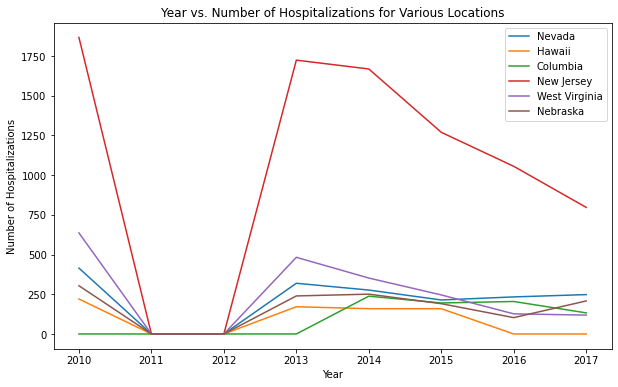

In [15]:
#now for the actual plot :)))
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(year_range, nevada, label='Nevada')
plt.plot(year_range, hawaii, label='Hawaii')
plt.plot(year_range, columbia, label='Columbia')
plt.plot(year_range, nj, label='New Jersey')
plt.plot(year_range, wv, label='West Virginia')
plt.plot(year_range, nebraska, label='Nebraska')
plt.legend(loc=1)
plt.title('Year vs. Number of Hospitalizations for Various Locations')
plt.xlabel('Year')
plt.ylabel('Number of Hospitalizations')
plt.show()

**(submitted for checkpoint 1)**

As previously noted, this particular dataset contains a lot of NaN values as well as redundant (if not completely null) features, so there weren’t a lot of other quantitative variables I was able to use for the visualization. However, upon further inspection, I thought that it might be interesting to consider visualizing the year versus the number of hospitalizations, stratified by state, in case the year might be a confounding variable that could affect our hypothesis testing. 

The exact process I took consisted of dropping all rows containing NaN in the ‘DataValueAlt’ column, since that’s the number of hospitalizations per year, and then picking a representative state for each major region of the United States (West, Midwest, South, and Northeast), including Hawaii and the District of Columbia for some added geographical diversity. However, this reduced the dataset to only containing information for maybe 25 states, because data was unavailable for the rest. Consequently, I tried to select the state that had data collected for the most years so that the visualization would be useful, although it seems that no data was collected for ANY state during 2011 and 2012. Then, I grouped by year after filtering on the state, and averaged the number of hospitalizations, and inserted zeroes into those arrays as needed for the plot.

The most obvious phenomenon is the drastically higher average amount of hospitalizations per year that New Jersey has, in comparison with the other states. Hawaii, by contrast, has a consistently low amount of hospitalizations. Without further investigation, we of course can’t determine if this is mainly due to asthma incidence levels being affected by location, or if more data happened to be collected in New Jersey than in Hawaii. Additionally, there seems to be a general decline in hospitalizations over the year, although this could simply be due to a decline in reporting since the study spans 8 years. We are curious to see if New Jersey’s high amount of hospitalizations is simply an outlier or indicative of the very thing we’re attempting to test -- that geographic location does in fact influence the number of hospitalizations for asthma. 



# 2. Causal Inference - Matching (for checkpoint 2)

Since we're investigating whether or not there's a causal relationship between gender and asthma mortality rate, we determined that the average treatment effect (which is a measure of causality, as discussed in lecture) would be an apt metric to compute. 

**Unconfoundedness assumption:** we will condition on our confounders of location and year, which allows us to assume that our "treatment" of gender is therefore independent of asthma mortality rates. 
*    Originally we planned to condition on ethnicity and age as well, since those certainly seem like they impact asthma mortality rates, but unfortunately the dataset doesn't include them as individual features for each instance, so there's no feasible way to include them while accurately calculating the ATE.

In this way, if there truly is no causal relationship between gender and asthma mortality rates, then we should expect our calculation of the ATE to be close to 0.

Dataset manipulation process:

1.   filter so we're only looking at the asthma mortality rate instances
2.   remove rows with NaN values in any of the DataValueAlt, YearStart, LocationDesc, or StratificationCategory1 columns so that matching can be performed
3.   determine remaining unique values for LocationDesc and YearStart to match on those
4.   for each of these year-location combinations, split into male and female, then subtract the DataValueAlt values to get the treatment effect for this instance
5.   average all of these to get the final ATE

In [33]:
#filtering on 'Asthma mortality rate'; the QuestionID is 'AST4_1' 
mort_asthma = asthma[asthma['QuestionID'] == 'AST4_1']
mort_asthma.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2012,2012,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,37.0,37.0,NaN,NaN,NaN,NaN,Gender,Female,NaN,NaN,NaN,NaN,NaN,1,AST,AST4_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
1,2014,2014,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,22.0,22.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,1,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
2,2011,2011,AZ,Arizona,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,29.0,29.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,4,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
3,2015,2015,CT,Connecticut,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,34.0,34.0,NaN,NaN,NaN,NaN,Gender,Female,NaN,NaN,NaN,NaN,NaN,9,AST,AST4_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2011,2011,FL,Florida,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,54.0,54.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,12,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN


In [41]:
#remove rows with NaNs in 'LocationDesc', 'YearStart', 'DataValueAlt'; filter on gender for 'StratificationCategory1'
mort_asthma = mort_asthma[mort_asthma['LocationDesc'].notna()][mort_asthma['YearStart'].notna()][mort_asthma['DataValueAlt'].notna()][mort_asthma['StratificationCategory1'] == 'Gender']
mort_asthma.isna().sum()

YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
DataSource                      0
Topic                           0
Question                        0
Response                     1371
DataValueUnit                 457
DataValueType                   0
DataValue                       0
DataValueAlt                    0
DataValueFootnoteSymbol      1371
DatavalueFootnote            1371
LowConfidenceLimit            457
HighConfidenceLimit           457
StratificationCategory1         0
Stratification1                 0
StratificationCategory2      1371
Stratification2              1371
StratificationCategory3      1371
Stratification3              1371
ResponseID                   1371
LocationID                      0
TopicID                         0
QuestionID                      0
DataValueTypeID                 0
StratificationCategoryID1       0
StratificationID1               0
Stratification

In [43]:
mort_asthma.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2012,2012,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,37.0,37.0,NaN,NaN,NaN,NaN,Gender,Female,NaN,NaN,NaN,NaN,NaN,1,AST,AST4_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
1,2014,2014,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,22.0,22.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,1,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
2,2011,2011,AZ,Arizona,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,29.0,29.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,4,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
3,2015,2015,CT,Connecticut,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,34.0,34.0,NaN,NaN,NaN,NaN,Gender,Female,NaN,NaN,NaN,NaN,NaN,9,AST,AST4_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2011,2011,FL,Florida,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,54.0,54.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,12,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN


In [48]:
#ACTUAL MATCHING PART: for each state, find individual years. if there is data for both male and female stratifications, calculate DataValueAlt(male) - DataValueAlt(female); otherwise skip (can't actually calculate treatment effect)
total_treatment_effect = 0
num_samples = 0
states = mort_asthma['LocationDesc'].unique()
for s in states:
  mort_subset = mort_asthma[mort_asthma['LocationDesc'] == s]
  subset_years = mort_subset['YearStart'].unique()
  for y in subset_years:
    mort_subset_years = mort_subset[mort_subset['YearStart'] == y]
    if len(mort_subset_years['Stratification1'].unique()) == 1:
      continue
    else:
      male_te = np.mean(mort_subset_years[mort_subset_years['Stratification1'] == 'Male']['DataValueAlt'])
      female_te = np.mean(mort_subset_years[mort_subset_years['Stratification1'] == 'Female']['DataValueAlt'])
      total_treatment_effect += (male_te - female_te)
      num_samples += 1

In [50]:
ate = total_treatment_effect / num_samples
ate

-10.996891191709844

After matching on 193 combinations of year and location, our ATE seems to be a pretty significant value of nearly -11 percent -- possibly meaning that the number of females who died from asthma-related causes was 11% higher than the number of males! Once again, since the ATE is in fact a measure of causality, we can tentatively conclude (since we were unable to condition on age and ethnicity) that there is in fact a causal relationship between gender and asthma mortality rates.

# 3. Multiple Hypothesis Testing


To test our hypothesis and the 5 derivatives of it, we'll use permutation testing.

Because we are constantly comparing the average number of hospitalizations per year from two regions, our null hypothesis would state that the difference in this average number should be close to 0. 

Process:
1.   simulate null distribution: bootstrap samples from each region without replacement. shuffle all the labels of the combined regions. assign some to one region and some to the other (probably evenly split). find the difference between the averages of these two shuffled groups. repeat until there are enough simulated differences to generate a distribution
2.   calculate the actual distribution differences for a similar number of samples WITHOUT shuffling
3.   compare the actual difference to the null distribution and calculate a p-value for the NULL hypothesis, which states the reverse of our actual hypothesis
4.   perform this for each of the 5 hypotheses

In [16]:
#uploading regions.csv to join with this dataframe so we can just sample from the overall region
files.upload();

Saving regions.csv to regions.csv


In [18]:
regions = pd.read_csv('regions.csv')
regions.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [19]:
#join with loc_asthma on 'State' and 'LocationDesc'
loc_asthma = loc_asthma.join(regions.set_index('State'), how='left', on='LocationDesc')
loc_asthma.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,State Code,Region,Division
16,2017,2017,FL,Florida,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,5216.0,5216.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,12,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN,FL,South,South Atlantic
17,2010,2010,NM,New Mexico,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,1048.0,1048.0,NaN,NaN,NaN,NaN,Gender,Female,NaN,NaN,NaN,NaN,NaN,35,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN,NM,West,Mountain
18,2014,2014,WV,West Virginia,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,650.0,650.0,NaN,NaN,NaN,NaN,Gender,Male,NaN,NaN,NaN,NaN,NaN,54,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN,WV,South,South Atlantic
9833,2017,2017,GA,Georgia,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,192.0,192.0,NaN,NaN,NaN,NaN,Race/Ethnicity,Hispanic,NaN,NaN,NaN,NaN,NaN,13,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN,GA,South,South Atlantic
9834,2014,2014,NM,New Mexico,State Inpatient Data,Asthma,Hospitalizations for asthma,NaN,NaN,Number,806.0,806.0,NaN,NaN,NaN,NaN,Race/Ethnicity,Hispanic,NaN,NaN,NaN,NaN,NaN,35,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN,NM,West,Mountain


**NULL hypothesis 1:** There are not more hospitalizations yearly in the Northeast than in the South. 

In [20]:
#simulating null distribution with 1000 samples with a SET SEED. bootstrapped samples from populations will be 100% of actual size
np.random.seed(42)
from sklearn.utils import shuffle
NE_S_nulls = []
for i in range(1000):
  NE = loc_asthma[loc_asthma['Region'] == 'Northeast'].sample(frac=1, replace=True)
  S = loc_asthma[loc_asthma['Region'] == 'South'].sample(frac=1, replace=True)
  NE_S = NE.append(S)
  new_labels = shuffle(NE_S['DataValueAlt'].values)
  NE_S['Shuffled Hosps'] = new_labels
  NE_avg = np.mean(NE_S[NE_S['Region'] == 'Northeast'].groupby('YearStart').mean()['Shuffled Hosps'])
  S_avg = np.mean(NE_S[NE_S['Region'] == 'South'].groupby('YearStart').mean()['Shuffled Hosps'])
  difference = (NE_avg - S_avg)
  NE_S_nulls.append(difference)  

In [21]:
#calculating the actual difference between NE and S, then generating p-value as # of null values above this difference
NE_S_diff = np.mean(loc_asthma[loc_asthma['Region'] == 'Northeast'].groupby('YearStart').mean()['DataValueAlt']) - np.mean(loc_asthma[loc_asthma['Region'] == 'South'].groupby('YearStart').mean()['DataValueAlt'])
p1 = sum([(null > NE_S_diff) for null in NE_S_nulls]) / len(NE_S_nulls)

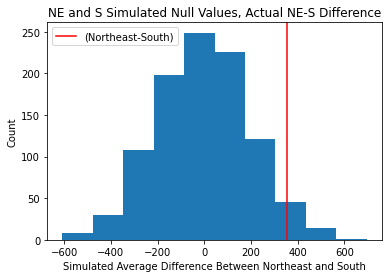

In [22]:
#plotting simulated nulls vs. actual NE-S difference
plt.hist(NE_S_nulls)
plt.axvline(x=NE_S_diff, c='r', label='(Northeast-South)')
plt.title("NE and S Simulated Null Values, Actual NE-S Difference")
plt.legend()
plt.xlabel('Simulated Average Difference Between Northeast and South')
plt.ylabel('Count')
plt.show()

**NULL hypothesis 2:** There are not more hospitalizations yearly in the Northeast than in the West.

In [23]:
#simulating null distribution for Northeast and West
NE_W_nulls = []
for i in range(1000):
  NE = loc_asthma[loc_asthma['Region'] == 'Northeast'].sample(frac=1, replace=True)
  W = loc_asthma[loc_asthma['Region'] == 'West'].sample(frac=1, replace=True)
  NE_W = NE.append(W)
  new_labels = shuffle(NE_W['DataValueAlt'].values)
  NE_W['Shuffled Hosps'] = new_labels
  NE_avg = np.mean(NE_W[NE_W['Region'] == 'Northeast'].groupby('YearStart').mean()['Shuffled Hosps'])
  W_avg = np.mean(NE_W[NE_W['Region'] == 'West'].groupby('YearStart').mean()['Shuffled Hosps'])
  difference = (NE_avg - W_avg)
  NE_W_nulls.append(difference) 

In [24]:
#calculating the difference between NE and W, then generating p-value #2
NE_W_diff = np.mean(loc_asthma[loc_asthma['Region'] == 'Northeast'].groupby('YearStart').mean()['DataValueAlt']) - np.mean(loc_asthma[loc_asthma['Region'] == 'West'].groupby('YearStart').mean()['DataValueAlt'])
p2 = sum([(null > NE_W_diff) for null in NE_W_nulls]) / len(NE_W_nulls)

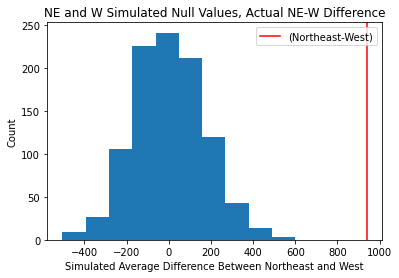

In [25]:
#plotting simulated nulls vs. actual NE-W difference
plt.hist(NE_W_nulls)
plt.axvline(x=NE_W_diff, c='r', label='(Northeast-West)')
plt.title("NE and W Simulated Null Values, Actual NE-W Difference")
plt.legend()
plt.xlabel('Simulated Average Difference Between Northeast and West')
plt.ylabel('Count')
plt.show()

**NULL hypothesis 3:** There are not more hospitalizations yearly in the Midwest than in the South.

In [26]:
#simulating null distribution for Midwest and South
MW_S_nulls = []
for i in range(1000):
  MW = loc_asthma[loc_asthma['Region'] == 'Midwest'].sample(frac=1, replace=True)
  S = loc_asthma[loc_asthma['Region'] == 'South'].sample(frac=1, replace=True)
  MW_S = MW.append(S)
  new_labels = shuffle(MW_S['DataValueAlt'].values)
  MW_S['Shuffled Hosps'] = new_labels
  MW_avg = np.mean(MW_S[MW_S['Region'] == 'Midwest'].groupby('YearStart').mean()['Shuffled Hosps'])
  S_avg = np.mean(MW_S[MW_S['Region'] == 'South'].groupby('YearStart').mean()['Shuffled Hosps'])
  difference = (MW_avg - S_avg)
  MW_S_nulls.append(difference) 

In [27]:
#calculating the difference between MW and S, then generating p-value #3
MW_S_diff = np.mean(loc_asthma[loc_asthma['Region'] == 'Midwest'].groupby('YearStart').mean()['DataValueAlt']) - np.mean(loc_asthma[loc_asthma['Region'] == 'South'].groupby('YearStart').mean()['DataValueAlt'])
p3 = sum([(null > MW_S_diff) for null in MW_S_nulls]) / len(MW_S_nulls)

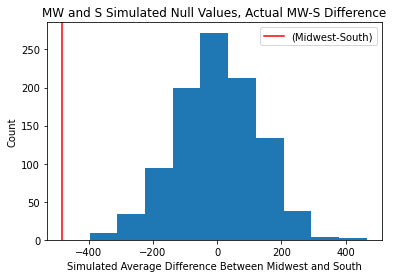

In [28]:
#plotting simulated nulls vs. actual MW-S difference
plt.hist(MW_S_nulls)
plt.axvline(x=MW_S_diff, c='r', label='(Midwest-South)')
plt.title("MW and S Simulated Null Values, Actual MW-S Difference")
plt.legend()
plt.xlabel('Simulated Average Difference Between Midwest and South')
plt.ylabel('Count')
plt.show()

**NULL hypothesis 4:** There are not more hospitalizations yearly in the Midwest than in the West.

In [29]:
#simulating null distribution for Midwest and West
MW_W_nulls = []
for i in range(1000):
  MW = loc_asthma[loc_asthma['Region'] == 'Midwest'].sample(frac=1, replace=True)
  W = loc_asthma[loc_asthma['Region'] == 'West'].sample(frac=1, replace=True)
  MW_W = MW.append(W)
  new_labels = shuffle(MW_W['DataValueAlt'].values)
  MW_W['Shuffled Hosps'] = new_labels
  MW_avg = np.mean(MW_W[MW_W['Region'] == 'Midwest'].groupby('YearStart').mean()['Shuffled Hosps'])
  W_avg = np.mean(MW_W[MW_W['Region'] == 'West'].groupby('YearStart').mean()['Shuffled Hosps'])
  difference = (MW_avg - W_avg)
  MW_W_nulls.append(difference) 

In [30]:
#calculating the difference between MW and W, then generating p-value #4
MW_W_diff = np.mean(loc_asthma[loc_asthma['Region'] == 'Midwest'].groupby('YearStart').mean()['DataValueAlt']) - np.mean(loc_asthma[loc_asthma['Region'] == 'West'].groupby('YearStart').mean()['DataValueAlt'])
p4 = sum([(null > MW_W_diff) for null in MW_W_nulls]) / len(MW_W_nulls)

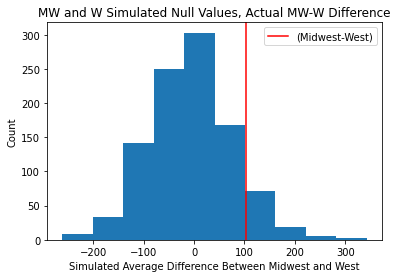

In [31]:
#plotting simulated nulls vs. actual MW-W difference
plt.hist(MW_W_nulls)
plt.axvline(x=MW_W_diff, c='r', label='(Midwest-West)')
plt.title("MW and W Simulated Null Values, Actual MW-W Difference")
plt.legend()
plt.xlabel('Simulated Average Difference Between Midwest and West')
plt.ylabel('Count')
plt.show()

**NULL hypothesis 5:** There are not more hospitalizations yearly in the South than in the West.

In [32]:
#simulating null distribution for South and West
S_W_nulls = []
for i in range(1000):
  S = loc_asthma[loc_asthma['Region'] == 'South'].sample(frac=1, replace=True)
  W = loc_asthma[loc_asthma['Region'] == 'West'].sample(frac=1, replace=True)
  S_W = S.append(W)
  new_labels = shuffle(S_W['DataValueAlt'].values)
  S_W['Shuffled Hosps'] = new_labels
  S_avg = np.mean(S_W[S_W['Region'] == 'South'].groupby('YearStart').mean()['Shuffled Hosps'])
  W_avg = np.mean(S_W[S_W['Region'] == 'West'].groupby('YearStart').mean()['Shuffled Hosps'])
  difference = (S_avg - W_avg)
  S_W_nulls.append(difference) 

In [33]:
#calculating the difference between S and W, then generating p-value #5
S_W_diff = np.mean(loc_asthma[loc_asthma['Region'] == 'South'].groupby('YearStart').mean()['DataValueAlt']) - np.mean(loc_asthma[loc_asthma['Region'] == 'West'].groupby('YearStart').mean()['DataValueAlt'])
p5 = sum([(null > S_W_diff) for null in S_W_nulls]) / len(S_W_nulls)

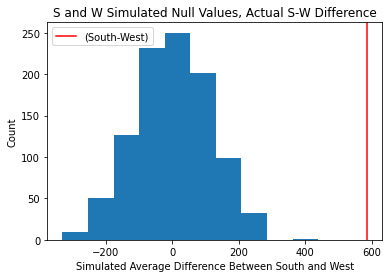

In [34]:
#plotting simulated nulls vs. actual S-W difference
plt.hist(S_W_nulls)
plt.axvline(x=S_W_diff, c='r', label='(South-West)')
plt.title("S and W Simulated Null Values, Actual S-W Difference")
plt.legend()
plt.xlabel('Simulated Average Difference Between South and West')
plt.ylabel('Count')
plt.show()

In [37]:
print('p1:', p1)
print('p2:', p2)
print('p3:', p3)
print('p4:', p4)
print('p5:', p5)

p1: 0.042
p2: 0.0
p3: 1.0
p4: 0.095
p5: 0.0


As we can see from the visualizations, these p-values provide evidence in favor of rejecting the overall null hypothesis in which geographic location does NOT impact the yearly number of hospitalizations. Even though hypothesis #3 resulted in a p-value of 1.0, this may be interpretable as a reversal of the hypothesis: there are more hospitalizations yearly in the South than in the Midwest, which does still show a correlation between location and number of hospitalizations.

So, based on the p-values alone and using a threshold of $\alpha$ = 0.05, we'd reject 3 out of the 5 null hypotheses, and could even consider rejecting 4 given the interpretation of p3 provided above.

Now, we want to correct for errors in these generated p-values using the Bonferroni and Benjamini-Hochberg techniques, wherein "making a discovery" equates to rejecting a hypothesis based on its p-value. **Because these p-values were simulated using a null distribution which assumes that geographic location doesn't impact the number of hospitalizations, this means that if we reject a majority of these hypotheses even with the error corrections, we therefore reject the overall null hypothesis, possibly supporting our original hypothesis which states the reverse.**

## Bonferroni Error Correction

The Bonferroni correction controls the family-wise error rate, which is the probability that we make even one false discovery. It's therefore much more strict than the Benjamini-Hochberg correction because the threshold for rejection decreases with the number of tests.

Procedure:
1.   calculate new threshold for hypothesis testing, equal to $\frac{\alpha}{m}$, where m = the number of tests
2.   determine whether we reject each hypothesis based on this new threshold and the p-value
3.   we make a discovery if we still reject a hypothesis. it's a false positive if we do make a discovery post-correction but actually reject it with the $\alpha$ = 0.05 threshold

In [62]:
#very simple process :) using alpha = 0.05, m = 5
bonferroni_threshold = 0.05/5
p_values = {'p1': p1, 'p2': p2, 'p3': p3, 'p4': p4, 'p5': p5}
for p in p_values.keys():
  if p_values[p] <= bonferroni_threshold:
    decision = 'reject'
  else:
    decision = 'fail to reject'
  print('Decision for', str(p), ': ', decision)

Decision for p1 :  fail to reject
Decision for p2 :  reject
Decision for p3 :  fail to reject
Decision for p4 :  fail to reject
Decision for p5 :  reject


With the Bonferroni correction, we rejected null hypotheses 2 and 5, whereas we originally rejected 1, 2, and 5. We therefore made 1 false discovery, and our FWER = 0.2.

## Benjamini-Hochberg Error Correction

The Benjamini-Hochberg method seeks instead to control the false discovery rate: for a threshold of $\alpha$, only $\alpha$% of the discoveries should be incorrect.

Procedure:     
1.   sort p-values and index them 1-k
2.   compute the line $k * \frac{\alpha}{m}$
3.   find the largest k such that $p_k$ is below this line
4.   use this $p_k$ as the threshold: if a hypothesis' p-value is below $p_k$, reject it

In [63]:
#using my solution from lab 1... again, alpha = 0.05, m = 5
sorted_p_values = np.sort(list(p_values.values()))
compare_values = np.arange(1, len(p_values)+1) * (0.05/5)
comparisons = list(sorted_p_values <= compare_values)
k = 0
for i in range(0, len(p_values)):
  if comparisons[i]:
    k = i
b_h_threshold = sorted_p_values[k]
for p in p_values.keys():
  if p_values[p] <= b_h_threshold:
    decision = 'reject'
  else:
    decision = 'fail to reject'
  print('Decision for', str(p), ': ', decision)

Decision for p1 :  fail to reject
Decision for p2 :  reject
Decision for p3 :  fail to reject
Decision for p4 :  fail to reject
Decision for p5 :  reject


Just as with the Bonferroni correction, we rejected hypotheses 2 and 5 instead of 1, 2, and 5, and we made 1 false discovery. 

## Interpretation of Results

Rather conveniently, both error correction methods gave us the same results, and suggest that we shouldn't reject hypothesis 1. Because these results were the same, it doesn't seem to matter quite so much which metric is most applicable in terms of our concerns over FWER vs. FDP. Instead, if we're rejecting the overall null hypothesis based on a majority vote, our original decisions advise rejection, but the corrected ones indicate that we would fail to reject it.

This is where I believe the interpretation of p3 is most relevant: although a p-value of 1 means the hypothesis itself holds pretty much no value, we could get very very different results from simply switching the Midwest and South, because the p-value was not calculated using an absolute value, and the hypothesis is "symmetrical:" Midwest-South and South-Midwest imply the same thing -- a difference in hospitalizations due to location.

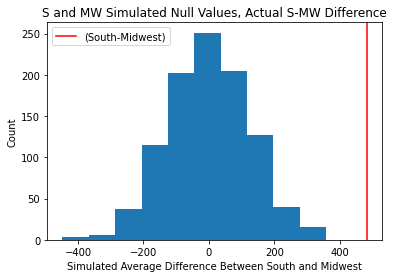

In [65]:
#recalculating hypothesis 3... this time it's South averages - Midwest averages
#simulating null distribution for South and Midwest 
S_MW_nulls = []
for i in range(1000):
  MW = loc_asthma[loc_asthma['Region'] == 'Midwest'].sample(frac=1, replace=True)
  S = loc_asthma[loc_asthma['Region'] == 'South'].sample(frac=1, replace=True)
  S_MW = MW.append(S)
  new_labels = shuffle(S_MW['DataValueAlt'].values)
  S_MW['Shuffled Hosps'] = new_labels
  MW_avg = np.mean(S_MW[S_MW['Region'] == 'Midwest'].groupby('YearStart').mean()['Shuffled Hosps'])
  S_avg = np.mean(S_MW[S_MW['Region'] == 'South'].groupby('YearStart').mean()['Shuffled Hosps'])
  difference = (S_avg - MW_avg)
  S_MW_nulls.append(difference) 

#calculating the difference between S and MW, then generating p-value #3.2
S_MW_diff = np.mean(loc_asthma[loc_asthma['Region'] == 'South'].groupby('YearStart').mean()['DataValueAlt']) - np.mean(loc_asthma[loc_asthma['Region'] == 'Midwest'].groupby('YearStart').mean()['DataValueAlt'])
p3_2 = sum([(null > S_MW_diff) for null in S_MW_nulls]) / len(S_MW_nulls)

#plotting simulated nulls vs. actual S-MW difference
plt.hist(S_MW_nulls)
plt.axvline(x=S_MW_diff, c='r', label='(South-Midwest)')
plt.title("S and MW Simulated Null Values, Actual S-MW Difference")
plt.legend()
plt.xlabel('Simulated Average Difference Between South and Midwest')
plt.ylabel('Count')
plt.show()

In [66]:
print('p3.2:', p3_2)

p3.2: 0.0


As expected, this new p-value is 0.0.

Using a threshold of $\alpha$ = 0.05, we can immediately determine that it would be rejected after the Bonferroni correction.

In [67]:
#for the Benjamini-Hochberg correction: 
p_values = {'p1': p1, 'p2': p2, 'p3.2': p3_2, 'p4': p4, 'p5': p5}
sorted_p_values = np.sort(list(p_values.values()))
compare_values = np.arange(1, len(p_values)+1) * (0.05/5)
comparisons = list(sorted_p_values <= compare_values)
k = 0
for i in range(0, len(p_values)):
  if comparisons[i]:
    k = i
b_h_threshold = sorted_p_values[k]
for p in p_values.keys():
  if p_values[p] <= b_h_threshold:
    decision = 'reject'
  else:
    decision = 'fail to reject'
  print('Decision for', str(p), ': ', decision)

Decision for p1 :  fail to reject
Decision for p2 :  reject
Decision for p3.2 :  reject
Decision for p4 :  fail to reject
Decision for p5 :  reject


We can see that we would reject this re-formulated hypothesis, even after the additional B-H correction. 

With this new p-value and result, we have the proper decisions regarding the sub-hypotheses to reject the overall null hypothesis, suggesting that **there is in fact a relationship between geographic location and number of hospitalizations for asthma.**